# Mental Health Care in the Last 4 Weeks
Metadata Updated: April 15, 2023

The U.S. Census Bureau, in collaboration with five federal agencies, launched the Household Pulse Survey to produce data on the social and economic impacts of Covid-19 on American households. The Household Pulse Survey was designed to gauge the impact of the pandemic on employment status, consumer spending, food security, housing, education disruptions, and dimensions of physical and mental wellness.

The survey was designed to meet the goal of accurate and timely weekly estimates. It was conducted by an internet questionnaire, with invitations to participate sent by email and text message. The sample frame is the Census Bureau Master Address File Data. Housing units linked to one or more email addresses or cell phone numbers were randomly selected to participate, and one respondent from each housing unit was selected to respond for him or herself. Estimates are weighted to adjust for nonresponse and to match Census Bureau estimates of the population by age, gender, race and ethnicity, and educational attainment. All estimates shown meet the NCHS Data Presentation Standards for Proportions.

In [1]:
import pandas as pd
import re
import numpy as np
import sklearn
import sklearn.linear_model
import sklearn.neighbors
import sklearn.tree
from scipy import stats

# Modify this to point to your data.
unique_data = pd.read_csv('Mental_Health_Care_in_the_Last_4_Weeks.csv', sep = ",")
unique_data[0:5]

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


In [2]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               10404 non-null  object 
 1   Group                   10404 non-null  object 
 2   State                   10404 non-null  object 
 3   Subgroup                10404 non-null  object 
 4   Phase                   10404 non-null  object 
 5   Time Period             10404 non-null  int64  
 6   Time Period Label       10404 non-null  object 
 7   Time Period Start Date  10404 non-null  object 
 8   Time Period End Date    10404 non-null  object 
 9   Value                   9914 non-null   float64
 10  LowCI                   9914 non-null   float64
 11  HighCI                  9914 non-null   float64
 12  Confidence Interval     9914 non-null   object 
 13  Quartile Range          6732 non-null   object 
 14  Suppression Flag        22 non-null   

In [3]:
unique_data.describe()

,Time Period,Value,LowCI,HighCI,Suppression Flag
count,10404.000000,9914.000000,9914.000000,9914.000000,22.0
mean,28.134948,17.450736,14.771565,20.475661,1.0
std,11.040210,8.270565,7.659396,9.052521,0.0
min,1.000000,1.400000,0.800000,2.000000,1.0
25%,20.000000,10.300000,8.000000,12.900000,1.0
50%,29.000000,16.200000,13.900000,19.200000,1.0
75%,37.000000,24.000000,20.800000,27.400000,1.0
max,45.000000,62.900000,53.200000,71.900000,1.0


# Unique Data Points
Variety of these points will be visualized to help me in understanding what kind of data I am working with and what unique data I will have to account for.

In [4]:
def unique_data_points(frame):
    points = ""
    for col in frame:
        points += col
        points += "\n"
        unique_points = set()
        for item in frame[col]:
            unique_points.add(item)
        for item in unique_points:
            points += str(item) + "\t"
        #print(unique_points)
        points += "\n\n"
    print(points[0:20000])

unique_data_points(unique_data)

Indicator
Took Prescription Medication for Mental Health, Last 4 Weeks	Received Counseling or Therapy, Last 4 Weeks	Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks	Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks	

Group
By Race/Hispanic ethnicity	By Disability status	By Presence of Symptoms of Anxiety/Depression	By State	By Sexual orientation	By Age	National Estimate	By Sex	By Education	By Gender identity	

State
North Dakota	Tennessee	Missouri	Hawaii	Texas	United States	New Mexico	Louisiana	Oklahoma	Wyoming	Montana	North Carolina	Florida	Vermont	Colorado	Iowa	New Hampshire	Wisconsin	District of Columbia	Alaska	Maine	Alabama	Minnesota	Pennsylvania	Ohio	Maryland	Delaware	Nebraska	Illinois	Arkansas	Washington	West Virginia	Arizona	Rhode Island	Idaho	Kansas	New York	Michigan	Virginia	Georgia	Nevada	Mississippi	Connecticut	New Jersey	Indiana	Oregon	Utah	South Carolina	Kentucky	California	South Dakota	Massachusetts	

Subgroup


# Notes for columns in dataset

Things to remember when manipulating the data.
- Indicator has 4 different labels(one hot encode)
- Group has corresponding subgroups, it may be more effective to model each group since some data with some data point does not reflect other data points (sexual orientation and age not in the same subgrouping)
- State has 50 states + 1 United States; one hot encode
- Phase get rid of dates
- Time; okay
- Time period Label, Time Period Start Date, Time Period End Date can be removed for now (possible relation by month?)
- Value; okay
- LowCI; okay
- HighCI; okay
- Quartile Range; plot LowCI with HighCI to see IQR (Likely to remove)
- Supression Flag (Likely to remove)
- Looks like all missing values are consistent in data

In [5]:
def nan_data(frame):
    nan = set()
    data = 0
    for col in frame:
        data = 0;   
        for i, item in enumerate(frame[col]):
            if (pd.isnull(frame.loc[i, col])):
                nan.add(col)
                data += 1
        print(col, str(data))            

In [6]:
nan_data(unique_data)

Indicator 0
Group 0
State 0
Subgroup 0
Phase 0
Time Period 0
Time Period Label 0
Time Period Start Date 0
Time Period End Date 0
Value 490
LowCI 490
HighCI 490
Confidence Interval 490
Quartile Range 3672
Suppression Flag 10382


# Data Cleaning

Some things you may want to do:
 - Deal with missing/empty values (get rid of data)
 - Fix numeric columns so that they actually contain numbers.
 - Remove inconsistencies from columns.
 - Assign a data type to each column.

'Indicator' has 4 unique values which are:

- 0: 'Took Prescription Medication for Mental Health, Last 4 Weeks'
- 1: 'Received Counseling or Therapy, Last 4 Weeks'
- 2: 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks',
- 3: 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks'

Of which I will represent each value by values 1 through 4. After looking at the third value, I believe that it would be best to separate it as its own subgroup in the values of 'Indicator'.

'Time Period', 'Time Period Label', 'Time Period Start Date', and 'Time Period End Date' are all connected to each other and do not need multiple columns to represent.

In [7]:
#DON'T FORGET TO ADD A FUNCTION TO CHANGE DTYPES
"""
    for val in frame['Time Period Label'].unique():
        new_frame.loc[new_frame['Time Period Label'] == val, 'Time Period Label'] = re.findall(r"[a-zA-Z]+", val)[0] +  re.findall(r"[a-zA-Z]+", val)[1]
    new_frame['Phase'] = new_frame['Phase'].astype(float)
    """   
def data_clean(frame):
    new_frame = frame.copy(deep = True)
    Time_Period = frame['Time Period Start Date'].astype(str) + "-" + frame['Time Period End Date']
    new_frame = new_frame.assign(Time_Period_Label = Time_Period)

    # Indicator's 4 unique values will be become numerical for flexibility
    for count, val in enumerate(frame['Indicator'].unique()):
        new_frame.loc[new_frame['Indicator'] == val, 'Indicator'] = count
    new_frame['Indicator'] = new_frame['Indicator'].astype(int)


    # Dropping frames that I have no context for and/or are the same data
    new_frame.drop(columns=['Time Period', 'Time Period Label', 'Quartile Range', 'Suppression Flag', 'Confidence Interval', 'Time Period Start Date', 'Time Period End Date'], axis = 1, inplace = True)
    # Dropping rest of data that has NA values
    new_frame.dropna(how = 'any', inplace = True)

    # Concatenating 'Time Period Start Date' and 'Time Period End Date' for 'Time Period Label' to combine all time measured data
    # Dropping rest of time measuring data columnns
    
    #new_frame = frame.drop(columns= ['Time Period Start Date',  'Time Period End Date'], axis = 1, inplace = True)
    
    
    return new_frame

cleaned_frame = data_clean(unique_data)
cleaned_frame.dtypes
cleaned_frame

,Indicator,Group,State,Subgroup,Phase,Value,LowCI,HighCI,Time_Period_Label
0,0,National Estimate,United States,United States,2,19.4,19.0,19.8,08/19/2020-08/31/2020
1,0,By Age,United States,18 - 29 years,2,18.7,17.2,20.3,08/19/2020-08/31/2020
2,0,By Age,United States,30 - 39 years,2,18.3,17.3,19.2,08/19/2020-08/31/2020
3,0,By Age,United States,40 - 49 years,2,20.4,19.5,21.3,08/19/2020-08/31/2020
4,0,By Age,United States,50 - 59 years,2,21.2,20.2,22.2,08/19/2020-08/31/2020
...,...,...,...,...,...,...,...,...,...
10399,3,By State,Virginia,Virginia,3.4,10.1,7.1,13.8,04/27/2022-05/09/2022
10400,3,By State,Washington,Washington,3.4,14.8,12.5,17.4,04/27/2022-05/09/2022
10401,3,By State,West Virginia,West Virginia,3.4,9.8,6.6,13.8,04/27/2022-05/09/2022
10402,3,By State,Wisconsin,Wisconsin,3.4,11.6,8.5,15.3,04/27/2022-05/09/2022


In [8]:
cleaned_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9914 entries, 0 to 10403
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Indicator          9914 non-null   int64  
 1   Group              9914 non-null   object 
 2   State              9914 non-null   object 
 3   Subgroup           9914 non-null   object 
 4   Phase              9914 non-null   object 
 5   Value              9914 non-null   float64
 6   LowCI              9914 non-null   float64
 7   HighCI             9914 non-null   float64
 8   Time_Period_Label  9914 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 774.5+ KB


# One Hot Encoding

For the presented data, I will one-hot encode the 'Time Period' , 'State' and the 'Phase' columns.

In figuring out if 'Time Period Label' was a factor towards understanding the correlation between the 'Indicator' and 'Time Period Label', I thought it would be the best to separate the data into the months in which each data was found `{month}{month}` such that I can see the correlation to when an indicator was more likely to be present during one day or the other ex. (JanJan). 
- JanJan
- JanFeb
- ...
- Dec...Jan

I will also one-hot encode the 'Phase' column as well as such values are numerical for the use of what phase they are in, not for some measurement.
'State' will also be one_hot encoded

In [9]:
def one_hot_encode(frame, columns):
    for column in columns:
        one_hot_col = pd.get_dummies(frame[column], prefix = column, dtype= float)
        frame = pd.concat([frame, one_hot_col], axis = 1)
        frame.pop(column)
    return frame
     
cleaned_frame = one_hot_encode(cleaned_frame, ['Time_Period_Label', 'Phase'])
cleaned_frame

,Indicator,Group,State,Subgroup,Value,LowCI,HighCI,Time_Period_Label_01/06/2021-01/18/2021,Time_Period_Label_01/20/2021-02/01/2021,Time_Period_Label_01/26/2022-02/07/2022,...,Time_Period_Label_12/01/2021-12/13/2021,Time_Period_Label_12/09/2020-12/21/2020,Time_Period_Label_12/29/2021-01/10/2022,Phase_2,Phase_3 (Jan 6 – Mar 29),Phase_3 (Oct 28 – Dec 21),Phase_3.1,Phase_3.2,Phase_3.3,Phase_3.4
0,0,National Estimate,United States,United States,19.4,19.0,19.8,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,By Age,United States,18 - 29 years,18.7,17.2,20.3,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,By Age,United States,30 - 39 years,18.3,17.3,19.2,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,By Age,United States,40 - 49 years,20.4,19.5,21.3,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,By Age,United States,50 - 59 years,21.2,20.2,22.2,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10399,3,By State,Virginia,Virginia,10.1,7.1,13.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10400,3,By State,Washington,Washington,14.8,12.5,17.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10401,3,By State,West Virginia,West Virginia,9.8,6.6,13.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10402,3,By State,Wisconsin,Wisconsin,11.6,8.5,15.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Multiple Groups and Subgroups
There are multiple groups in the data of which different data such as sex, state, age and etc. where the data does not show multiple groupings in the same data. To account for this, I will make a dictionary of dataframes where the key will be the grouping and the value will be dataframes with the grouping dropped.

After making the dictionary, I should make sense of the groupings and the unique subgrouping values. For example,

- The 'National Estimate' group dataframe's 'State' and 'Subgroup' column(s) have only one unique value, therefore it would be better to remove these column(s)

- The 'By Age' group dataframe's 'State' column(s) have only one unique value, therefore it would be better to remove these column(s)

- The 'By Sex' group dataframe's 'State' column(s) have only one unique value, therefore it would be better to remove these column(s)

- The 'By Presence of Symptoms of Anxiety/Depression' group dataframe's 'State' column(s) have only one unique value, therefore it would be better to remove these column(s)

- The 'By Race/Hispanic ethnicity' group dataframe's 'State' column(s) have only one unique value, therefore it would be better to remove these column(s)

- The 'By Education' group dataframe's 'State' column(s) have only one unique value, therefore it would be better to remove these column(s)

- The 'By State' group dataframe's 'State' and 'Subgroup' column are the same column, therefore it would be better to delete one of the columns

- The 'By No Group' group dataframe have all unique data #NOT IMPLEMENTED YET





In [10]:
groupDataFrames = {}
for group in cleaned_frame['Group'].unique():
    groupDataFrames[group] = cleaned_frame[cleaned_frame['Group'] == group].copy()
    groupDataFrames[group].drop('Group', inplace = True, axis = 1)

# National Estimate 132 rows
groupDataFrames['National Estimate'].drop('Subgroup', inplace = True, axis = 1)
groupDataFrames['National Estimate'].drop('State', inplace = True, axis = 1)
groupDataFrames['National Estimate'].reset_index(inplace = True, drop = True)

# By Age 911 rows
groupDataFrames['By Age'].drop('State', inplace = True, axis = 1)
groupDataFrames['By Age'] = one_hot_encode(groupDataFrames['By Age'], ['Subgroup'])
groupDataFrames['By Age'].reset_index(inplace = True, drop = True)

# By Sex 264 rows
groupDataFrames['By Sex'].drop('State', inplace = True, axis = 1)
groupDataFrames['By Sex'] = one_hot_encode(groupDataFrames['By Sex'], ['Subgroup'])
groupDataFrames['By Sex'].reset_index(inplace = True, drop = True)

# By Presence of Symptoms of Anxiety/Depression 264 rows
groupDataFrames['By Presence of Symptoms of Anxiety/Depression'].drop('State', inplace = True, axis = 1)
groupDataFrames['By Presence of Symptoms of Anxiety/Depression'] = one_hot_encode(groupDataFrames['By Presence of Symptoms of Anxiety/Depression'], ['Subgroup'])

# By Race/Hispanic ethnicity 660 rows
groupDataFrames['By Race/Hispanic ethnicity'].drop('State', inplace = True, axis = 1)
groupDataFrames['By Race/Hispanic ethnicity'] = one_hot_encode(groupDataFrames['By Race/Hispanic ethnicity'], ['Subgroup'])
groupDataFrames['By Race/Hispanic ethnicity'].reset_index(inplace = True, drop = True)

# By Education 528 rows
groupDataFrames['By Education'].drop('State', inplace = True, axis = 1)
groupDataFrames['By Education'] = one_hot_encode(groupDataFrames['By Education'], ['Subgroup'])
groupDataFrames['By Education'].reset_index(inplace = True, drop = True)

# By State 6723 rows
groupDataFrames['By State'].drop('State', inplace = True, axis = 1)
groupDataFrames['By State'] = one_hot_encode(groupDataFrames['By State'], ['Subgroup'])
groupDataFrames['By State'].reset_index(inplace = True, drop = True)

# By No Group
# BAD MEASURE, THE DATA IS HEAVILY SKEWED TOWARDS 'By State'

groupDataFrames['By Education']

,Indicator,Value,LowCI,HighCI,Time_Period_Label_01/06/2021-01/18/2021,Time_Period_Label_01/20/2021-02/01/2021,Time_Period_Label_01/26/2022-02/07/2022,Time_Period_Label_02/03/2021-02/15/2021,Time_Period_Label_02/17/2021-03/01/2021,Time_Period_Label_03/02/2022-03/14/2022,...,Phase_3 (Jan 6 – Mar 29),Phase_3 (Oct 28 – Dec 21),Phase_3.1,Phase_3.2,Phase_3.3,Phase_3.4,Subgroup_Bachelor's degree or higher,Subgroup_High school diploma or GED,Subgroup_Less than a high school diploma,Subgroup_Some college/Associate's degree
0,0,17.4,14.9,20.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,18.1,17.2,19.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,21.0,20.2,21.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,19.4,19.0,19.9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,7.1,5.6,8.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2,28.4,27.5,29.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
524,3,12.2,9.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
525,3,9.1,7.7,10.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
526,3,15.1,14.0,16.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


- 0: 'Took Prescription Medication for Mental Health, Last 4 Weeks'
- 1: 'Received Counseling or Therapy, Last 4 Weeks'
- 2: 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks',
- 3: 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks'

NOTE:
Indicators are evenly distributed between datasets

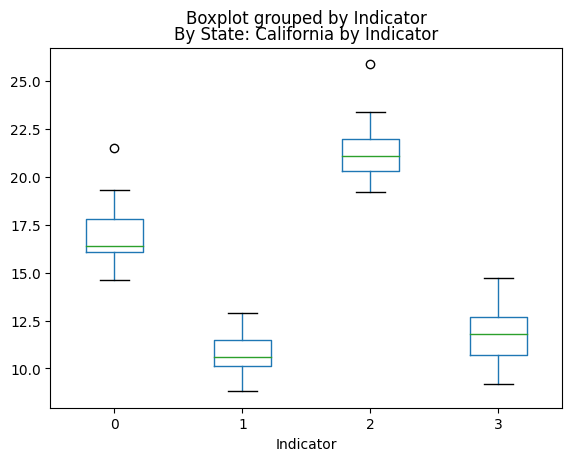

33


<Axes: title={'center': 'High school diploma or GED'}, xlabel='Value', ylabel='Indicator'>

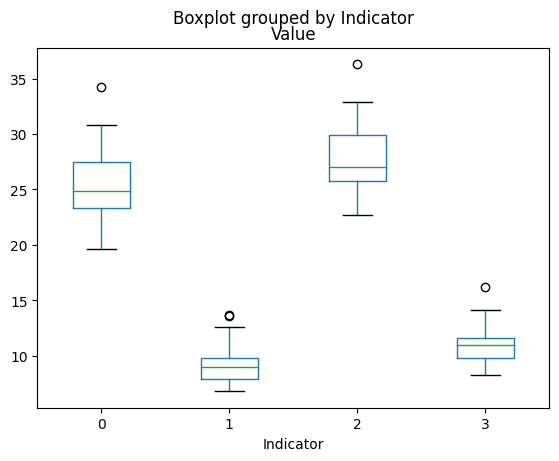

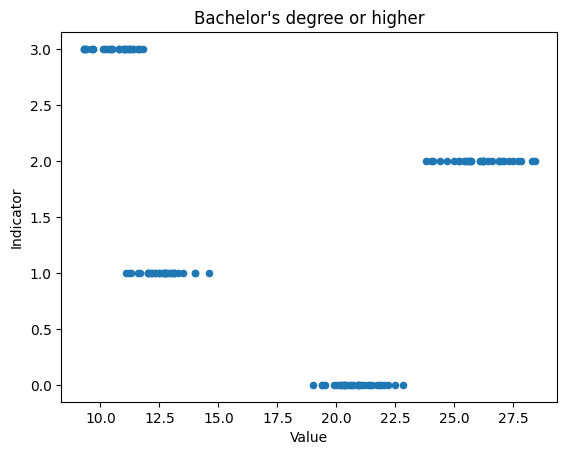

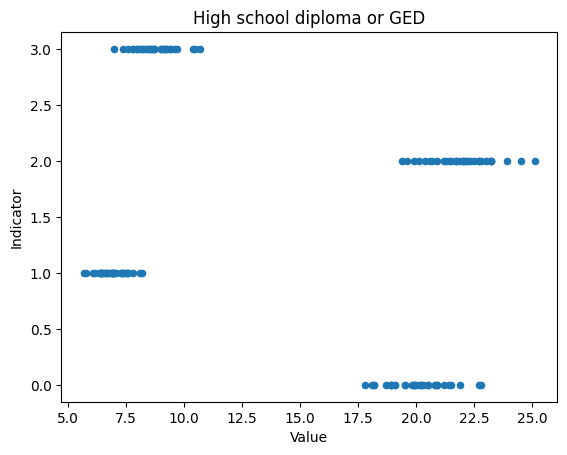

In [31]:
import matplotlib.pyplot as plt

for 
#groupDataFrames['By State'][groupDataFrames['By State']['Subgroup_Texas'] == 1].hist(column = ['Indicator'])
#groupDataFrames['By State'].hist(column = ['Indicator'])
by_california = groupDataFrames['By State'][groupDataFrames['By State']['Subgroup_California'] == 1]
#by_california.plot(kind = 'box', x = 'Value', y = 'Indicator', title = "California")
cal = by_california.boxplot(by = 'Indicator', column = ['Value'], grid = False)
cal.plot()
plt.title('By State: California by Indicator')
plt.show()
by_louisiana = groupDataFrames['By State'][groupDataFrames['By State']['Subgroup_Louisiana'] == 1]
by_louisiana.boxplot(by = 'Indicator', column = ['Value'], grid = False)
#by_idaho.plot(kind = 'scatter', x = 'Value', y = 'Indicator', title = "Louisiana")
print(len(by_california[by_california['Indicator'] == 3]))

by_bach = groupDataFrames['By Education'][groupDataFrames['By Education']["Subgroup_Bachelor's degree or higher"] == 1]
by_hs = groupDataFrames['By Education'][groupDataFrames['By Education']["Subgroup_High school diploma or GED"] == 1]

by_bach.plot(kind = 'scatter', x = 'Value', y = 'Indicator', title = "Bachelor's degree or higher")
by_hs.plot(kind = 'scatter', x = 'Value', y = 'Indicator', title = "High school diploma or GED")

# 0: 'Took Prescription Medication for Mental Health, Last 4 Weeks'
# 1: 'Received Counseling or Therapy, Last 4 Weeks'
# 2: 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks',
# 3: 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks'